In [602]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm

In [603]:
#set working directory
os.chdir("D:\Edwisor_Submissions")
os.getcwd()

'D:\\Edwisor_Submissions'

In [604]:
#Import Csv file
df = pd.read_csv("day.csv",parse_dates=['dteday'])
#check the class of the df
type(df)
#check the number of the variable and observation
df.shape

(731, 16)

In [605]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [606]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [607]:
X = df.drop('cnt',1)

In [608]:
y = df.cnt

In [609]:
X.shape,y.shape

((731, 15), (731,))

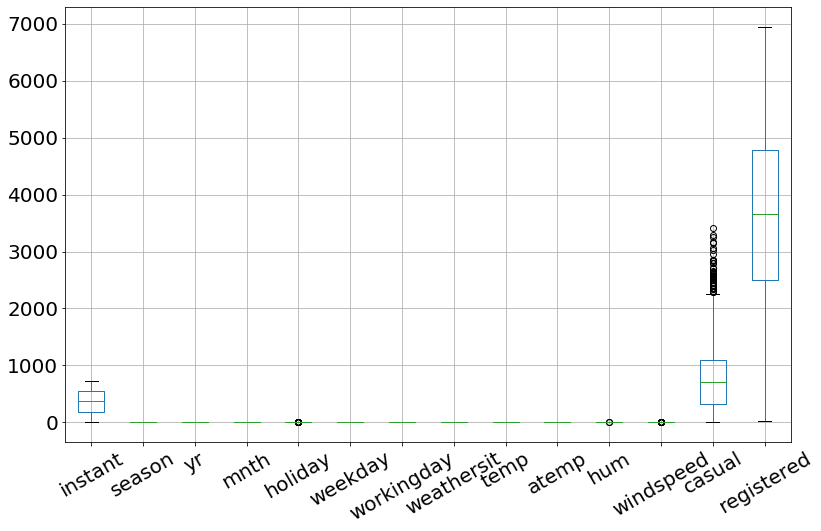

In [610]:
X.boxplot(fontsize=20,
    rot=30,
    grid=True,
    figsize=(13,8),
   )

In [611]:
from scipy import stats

In [612]:
X = X.drop('dteday',1)

In [613]:
Z = stats.zscore(X)
Z

array([[-1.729683  , -1.34821315, -1.00136893, ..., -0.38789169,
        -0.7537338 , -1.9254707 ],
       [-1.72494414, -1.34821315, -1.00136893, ...,  0.74960172,
        -1.04521412, -1.91520896],
       [-1.72020528, -1.34821315, -1.00136893, ...,  0.74663186,
        -1.06124554, -1.5566892 ],
       ...,
       [ 1.72020528, -1.34821315,  0.99863295, ..., -0.85355213,
        -1.00440687, -1.58683308],
       [ 1.72494414, -1.34821315,  0.99863295, ...,  2.06944426,
        -0.70563955, -1.42649329],
       [ 1.729683  , -1.34821315,  0.99863295, ..., -0.46020122,
        -0.59633443, -0.87620714]])

In [614]:
Z = pd.DataFrame(Z)
Z

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.729683,-1.348213,-1.001369,-1.600161,-0.171981,1.498809,-1.471225,1.110427,-0.826662,-0.679946,1.250171,-0.387892,-0.753734,-1.925471
1,-1.724944,-1.348213,-1.001369,-1.600161,-0.171981,-1.496077,-1.471225,1.110427,-0.721095,-0.740652,0.479113,0.749602,-1.045214,-1.915209
2,-1.720205,-1.348213,-1.001369,-1.600161,-0.171981,-0.996930,0.679706,-0.726048,-1.634657,-1.749767,-1.339274,0.746632,-1.061246,-1.556689
3,-1.715466,-1.348213,-1.001369,-1.600161,-0.171981,-0.497782,0.679706,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829,-1.078734,-1.412383
4,-1.710728,-1.348213,-1.001369,-1.600161,-0.171981,0.001366,0.679706,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307,-1.116627,-1.371336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.710728,-1.348213,0.998633,1.588660,-0.171981,0.500513,0.679706,1.110427,-1.318665,-1.521108,0.175807,2.061426,-0.876156,-1.147502
727,1.715466,-1.348213,0.998633,1.588660,-0.171981,0.999661,0.679706,1.110427,-1.323224,-1.346690,-0.266238,-0.452131,-0.297567,-0.772948
728,1.720205,-1.348213,0.998633,1.588660,-0.171981,1.498809,-1.471225,1.110427,-1.323224,-1.424344,0.878392,-0.853552,-1.004407,-1.586833
729,1.724944,-1.348213,0.998633,1.588660,-0.171981,-1.496077,-1.471225,-0.726048,-1.309558,-1.490049,-1.015664,2.069444,-0.705640,-1.426493


In [615]:
z_score = ((Z>2) | (Z<-2))

In [616]:
use_cols  = {'instant', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'}

In [617]:
z_score = z_score.rename(columns={0:'instant', 1:'season', 2:'yr', 3:'mnth', 4:'holiday', 5:'weekday',
       6:'workingday',7: 'weathersit', 8:'temp', 9:'atemp', 10:'hum', 11:'windspeed',
       12:'casual',13: 'registered'})

In [618]:
z_score.nunique()

instant       1
season        1
yr            1
mnth          1
holiday       2
weekday       1
workingday    1
weathersit    2
temp          2
atemp         2
hum           2
windspeed     2
casual        2
registered    2
dtype: int64

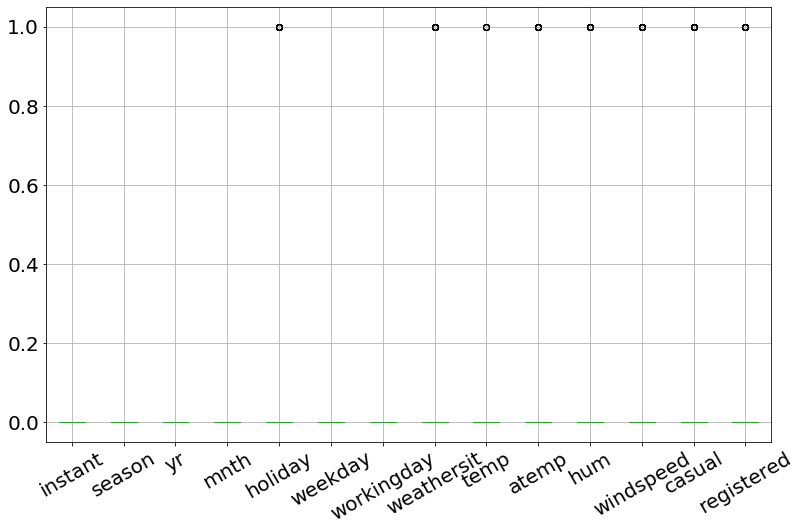

In [619]:
z_score.boxplot(fontsize=20,
    rot=30,
    grid=True,
    figsize=(13,8),
   )

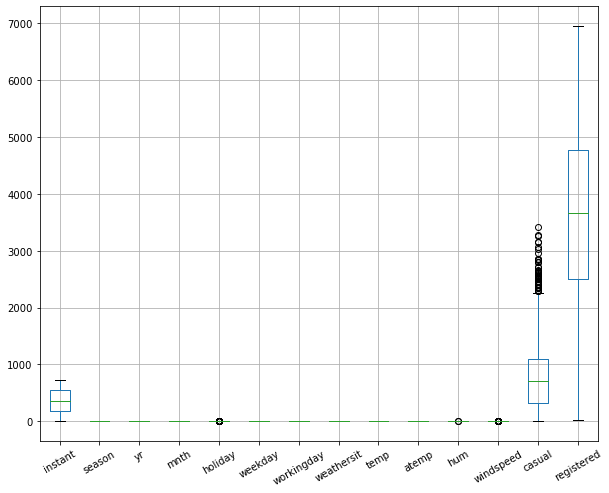

In [620]:
X.boxplot(fontsize=10,
    rot=30,
    grid=True,
    figsize=(10,8),
   )

In [20]:
q1, q3= np.percentile(X['hum'],[25,75])
iqr = q3 - q1
lower_bound_h = q1 -(1.5 * iqr) 
upper_bound_h = q3 +(1.5 * iqr) 
print(lower_bound_h,upper_bound_h)

q1, q3= np.percentile(X['windspeed'],[25,75])
iqr = q3 - q1
lower_bound_w = q1 -(1.5 * iqr) 
upper_bound_w = q3 +(1.5 * iqr) 
print(lower_bound_w,upper_bound_w)

q1, q3= np.percentile(X['casual'],[25,75])
iqr = q3 - q1
lower_bound_c = q1 -(1.5 * iqr) 
upper_bound_c = q3 +(1.5 * iqr) 
print(lower_bound_c,upper_bound_c)

q1, q3= np.percentile(X['temp'],[25,75])
iqr = q3 - q1
lower_bound_t = q1 -(1.5 * iqr) 
upper_bound_t = q3 +(1.5 * iqr) 
print(lower_bound_t,upper_bound_t)

q1, q3= np.percentile(X['atemp'],[25,75])
iqr = q3 - q1
lower_bound_a = q1 -(1.5 * iqr) 
upper_bound_a = q3 +(1.5 * iqr) 
print(lower_bound_a,upper_bound_a)

0.20468725 1.0455212500000002
-0.012446750000000034 0.38061125
-855.25 2266.75
-0.14041600000000015 1.1329160000000003
-0.06829675000000018 1.0147412500000002


In [21]:
num_val = ['temp','atemp','hum','windspeed','casual','registered']

In [22]:
#Detect and replace the outlier with NA
for i in num_val:
    q75,q25 = np.nanpercentile(df.loc[:,i],[75,25])

    iqr = q75-q25
    
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    X.loc[df.loc[:,i] < minimum,i] = np.nan
    X.loc[df.loc[:,i] > maximum,i] = np.nan
    
    print(i,' Missing value ---------- :- ',X.loc[:,i].isnull().sum())

temp  Missing value ---------- :-  0
atemp  Missing value ---------- :-  0
hum  Missing value ---------- :-  2
windspeed  Missing value ---------- :-  13
casual  Missing value ---------- :-  44
registered  Missing value ---------- :-  0


In [24]:
X['hum'] = X['hum'].replace(np.nan,lower_bound_h)
X['windspeed'] = X['windspeed'].replace(np.nan,lower_bound_w)
X['casual'] = X['casual'].replace(np.nan,upper_bound_c)


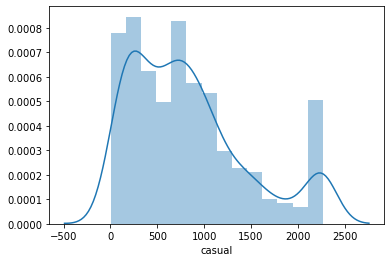

In [25]:
sns.distplot(X['casual'])

In [621]:


#Generate correlation matrix
corr = df.corr()
corr

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [324]:
use_cols = {'temp','hum','season','yr','mnth','weathersit','windspeed','casual','registered','season','weekday','workingday'}

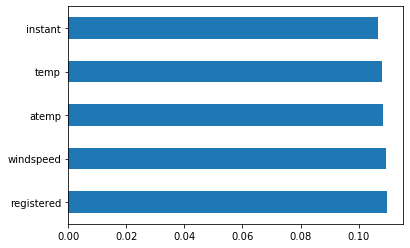

In [240]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
imp = feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [241]:
feat_importances

instant       0.106688
season        0.035018
yr            0.010821
mnth          0.070815
holiday       0.004827
weekday       0.073772
workingday    0.013540
weathersit    0.038025
temp          0.107941
atemp         0.108299
hum           0.106049
windspeed     0.109406
casual        0.105074
registered    0.109723
dtype: float64

In [622]:
X_copy = X

In [623]:
X = X_copy

In [326]:
X = X[use_cols]

In [625]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [626]:
X = scaler.fit_transform(X)

In [628]:
X = pd.DataFrame(X)

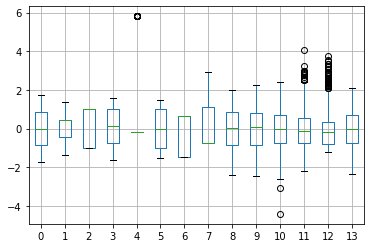

In [630]:
X.boxplot()

In [631]:
#create function for calculating the MPE
def MPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(((y_true - y_pred) / y_true)) * 100

In [632]:
#create function for calculating the MAPE
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.fabs((y_true - y_pred) / y_true)) * 100

In [697]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
regressor = LinearRegression()


In [698]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [699]:
lm = regressor.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(lm.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(lm.score(X_test, y_test)))
y_pred = lm.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE-->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))
print("MPE-->",MPE(y_test,y_pred))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on train set: 1.0
Mean Squared Error--> 7.58938212017403e-24
Mean absolute Error--> 2.2117257520387117e-12
R Square--> 1.0
RMSE--> 2.75488332242475e-12
MAPE--> 6.753771261150197e-14
MPE--> 1.1858685542149251e-14


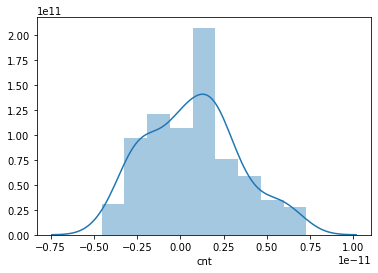

In [700]:
sns.distplot(y_test-y_pred)

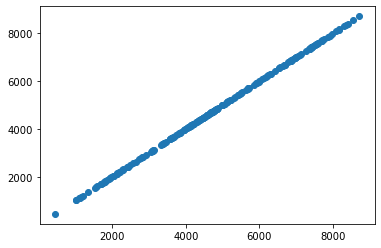

In [701]:
plt.scatter(y_test,y_pred)

In [702]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3.831626474331953e-24


In [705]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [713]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [714]:

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-15}
-3.0487280635914053e-22


In [715]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [716]:
ridge=Ridge(alpha=1e-15)
ridge = ridge.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(ridge.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(ridge.score(X_test, y_test)))
y_pred = lm.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

Coefficient of determination R^2 <-- on train set: 1.0
Coefficient of determination R^2 <-- on train set: 1.0
Mean Squared Error--> 7.899574849881415e-24
Mean absolute Error--> 2.282004888084802e-12
R Square--> 1.0
RMSE: 2.810618232681453e-12
MAPE--> 7.566888744817442e-14


In [710]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [711]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-2.571038810866497


In [712]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [646]:
## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(ridge,X,y,cv=10).mean()
cross_val

1.0

In [647]:
las = Lasso(alpha=1)
lasso = las.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(lasso.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(lasso.score(X_test, y_test)))
y_pred = lasso.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R Square-->",r2_score(y_test,y_pred))
print("MAPE-->",MAPE(y_test,y_pred))

Coefficient of determination R^2 <-- on train set: 0.9999995811294766
Coefficient of determination R^2 <-- on train set: 0.9999997255909361
Mean Squared Error--> 1.035770965055894
Mean absolute Error--> 0.8349762507795938
RMSE: 1.0177283355866111
R Square--> 0.999999725590936
MAPE--> 0.023611056546996426


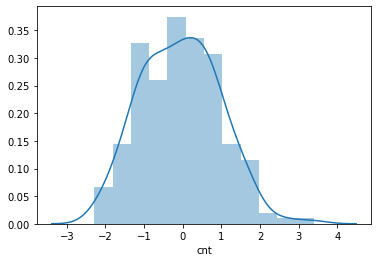

In [648]:
sns.distplot(y_test-y_pred)

In [651]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [652]:
ri = Ridge()
ridge = ri.fit(X_train,y_train)
print("Coefficient of determination R^2 <-- on train set: {}".format(ridge.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on train set: {}".format(ridge.score(X_test, y_test)))
y_pred = ridge.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

Coefficient of determination R^2 <-- on train set: 0.9999868778844893
Coefficient of determination R^2 <-- on train set: 0.999989352459066
Mean Squared Error--> 43.99217243446821
Mean absolute Error--> 5.034633322595869
R Square--> 0.999989352459066
RMSE: 6.632659529515156
MAPE--> 0.1675100059074525


In [653]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [654]:
from sklearn import tree
clf_D = DecisionTreeRegressor()
clf_D.fit(X_train,y_train)
y_pred = clf_D.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

Mean Squared Error--> 68956.55
Mean absolute Error--> 172.87727272727273
R Square--> 0.9826381697323188
RMSE: 262.5957920454934
MAPE--> 4.868676810001431


In [655]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [656]:
clf_R = RandomForestRegressor()
clf_R.fit(X_train,y_train)
y_pred = clf_R.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

Mean Squared Error--> 13394.085631818176
Mean absolute Error--> 71.65563636363636
R Square--> 0.9964965710017148
RMSE: 115.73282002879812
MAPE--> 1.9454569249347509


In [657]:
from sklearn.model_selection import RandomizedSearchCV

In [659]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 50, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(1, 50, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



In [660]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [1, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [1, 13, 25, 37, 50], 'min_samples_leaf': [1, 2, 5, 10]}


In [661]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [662]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [663]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 485 out of 500 | elapsed:   12.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [664]:
rf_random.best_params_,rf_random.best_score_

({'n_estimators': 50,
  'min_samples_split': 13,
  'min_samples_leaf': 1,
  'max_features': 'auto',
  'max_depth': 10},
 -38845.97313034088)

In [665]:
predictions=rf_random.predict(X_test)

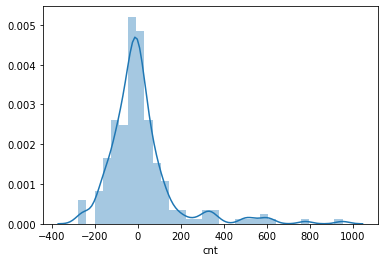

In [666]:
sns.distplot(y_test-predictions)

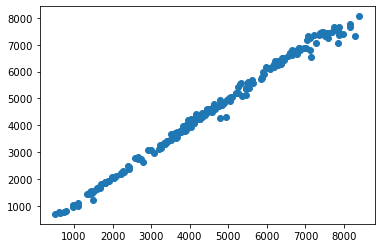

In [667]:
plt.scatter(y_test,predictions)

In [668]:

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("MAPE-->",MAPE(y_test,y_pred))

MAE: 98.00793243344042
MSE: 26630.132843247953
RMSE: 163.18741631402818
MAPE--> 1.9454569249347509


In [669]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [670]:
clf_X = XGBRegressor()
clf_X.fit(X_train,y_train)
y_pred = clf_X.predict(X_test)
print("Mean Squared Error-->",mean_squared_error(y_test,y_pred))
print("Mean absolute Error-->",mean_absolute_error(y_test,y_pred))
print("R Square-->",r2_score(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

[22:06:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error--> 17476.102905814252
Mean absolute Error--> 93.10565032958985
R Square--> 0.995411546008509
RMSE: 132.19721217111294
MAPE--> 2.672904124773361


C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [671]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [688]:

regressor=KNeighborsRegressor()
regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [689]:

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.9363302993740786
Coefficient of determination R^2 <-- on train set: 0.9214812669504308


In [690]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)
score.mean()

0.28159691608908644

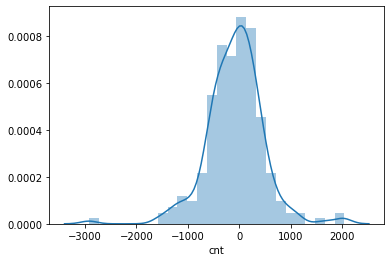

In [691]:
prediction=regressor.predict(X_test)
sns.distplot(y_test-prediction)

In [692]:
prediction=regressor.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("MAPE-->",MAPE(y_test,y_pred))

MAE: 401.8918181818181
MSE: 315155.23981818184
RMSE: 561.3868896030453
MAPE--> 82.9093111612885


In [693]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
   # score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

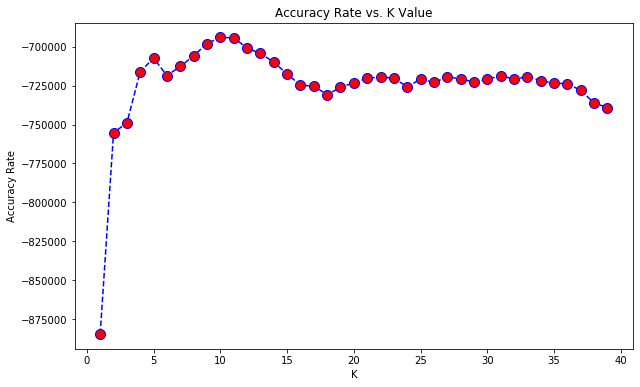

In [694]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [695]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)

In [696]:
regressor=KNeighborsRegressor(n_neighbors=4)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAPE-->",MAPE(y_test,y_pred))

MAE: 457.2022727272727
MSE: 432408.975
RMSE: 657.578113230664
MAPE--> 18.303258411281465


###### 

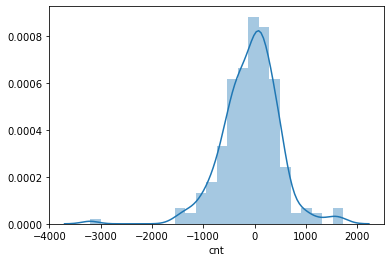

In [685]:
#prediction=regressor.predict(X_test)
sns.distplot(y_test-y_pred)

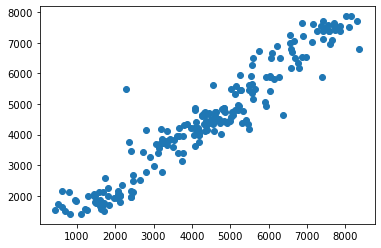

In [686]:
plt.scatter(y_test,y_pred)

In [687]:
y_pred = pd.DataFrame(y_pred)

In [598]:
y_test = pd.DataFrame(y_test)

In [601]:
predictions = pd.DataFrame([y_test,y_pred]).T
predictions.columns=['actual','Pred']